In [48]:
import pandas as pd
import numpy as np
import arviz as az
import pymc3 as pm
import scipy.stats as st
import seaborn as sns

# Load dataframe

In [49]:
df = pd.read_csv('./BattingPost.csv')
df = df.groupby('playerID', as_index = False).agg({'H' : 'sum', 'AB' : 'sum'})
df['H_RATE'] = df['H'] / df['AB']
df['H_RATE'] = df['H_RATE'].fillna(0)
df = df[df['H'] > 5]

# Sample from simple model

In [50]:
players = df[['H', 'AB']].values
SHAPE = players.shape[0]

In [51]:
with pm.Model() as m:
    
    # non informative prior
    hit_rate = pm.Beta('hit_rate', alpha = 1, beta = 1, shape = SHAPE)
    
    # alternatively, an informative prior derived from the data distrbution itself
    # in order to come up with these see the section below (Estimation of pior hyperparameters)
    #hit_rate = pm.Beta('hit_rate', alpha = 18, beta = 49, shape = SHAPE) 
    
    hits = pm.Binomial('hits', n=players[:,1], p = hit_rate, observed = players[:,0], shape = SHAPE)

In [52]:
# MC sampling
with m:
    trace = pm.sample(chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_rate]
Sampling 4 chains: 100%|████████████████████████████████████████| 4000/4000 [01:24<00:00, 47.22draws/s]


In [53]:
# 90% credible interval for parameter
pm.summary(trace, alpha = .05)

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
hit_rate__0,0.365943,0.054908,0.000723,0.263248,0.471411,5671.831051,0.999296
hit_rate__1,0.237030,0.075868,0.001104,0.103407,0.389305,4482.966278,0.999281
hit_rate__2,0.289035,0.055538,0.000972,0.176078,0.392593,4377.840291,0.999362
hit_rate__3,0.247640,0.080195,0.001160,0.107059,0.416638,5319.604515,0.999288
hit_rate__4,0.333500,0.077716,0.001161,0.191054,0.486509,4491.360991,0.999245
...,...,...,...,...,...,...,...
hit_rate__1271,0.280930,0.088313,0.001464,0.109228,0.447877,4847.113790,0.999143
hit_rate__1272,0.177818,0.057315,0.000847,0.072992,0.291897,4206.167970,0.999762
hit_rate__1273,0.277297,0.040784,0.000612,0.201562,0.357434,5033.035476,0.999730
hit_rate__1274,0.408663,0.103476,0.001379,0.208547,0.608059,5387.979625,1.000126


In [54]:
results = pm.summary(trace, alpha = .05)

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


In [55]:
results = pd.concat([df.reset_index(drop=True), results.reset_index(drop=True)], axis = 1, )

In [56]:
results.sort_values('hpd_2.5', ascending = False).head(20)

,playerID,H,AB,H_RATE,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
424,gilbe01,8,12,0.666667,0.641359,0.126240,0.001911,0.407657,0.895725,4922.568189,0.999616
759,mcclell01,10,16,0.625000,0.610511,0.112802,0.001684,0.392099,0.821122,5272.756431,1.000118
89,bicheda01,10,17,0.588235,0.578719,0.110748,0.001775,0.362112,0.789739,4000.104138,0.999203
568,iorgda01,12,23,0.521739,0.519967,0.097334,0.001316,0.334349,0.706135,5350.346716,0.999234
985,roberda01,11,22,0.500000,0.499175,0.093865,0.001509,0.320333,0.691279,4622.206599,0.999540
734,martipe01,23,55,0.418182,0.421885,0.064090,0.000996,0.310076,0.553630,4929.285761,0.999155
128,brownbo03,18,41,0.439024,0.445360,0.073804,0.001148,0.298086,0.582816,4807.827083,0.999533
710,lynnfr01,22,54,0.407407,0.410099,0.065665,0.000907,0.296422,0.552985,6010.967180,0.999767
589,johnsja01,10,21,0.476190,0.479343,0.100411,0.001492,0.295510,0.681572,4746.198923,0.999527
312,duffyhu01,12,26,0.461538,0.462286,0.090843,0.001341,0.288699,0.634882,4211.540117,0.999851


In [57]:
results.sort_values('AB', ascending = False).head(20)

,playerID,H,AB,H_RATE,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
583,jeterde01,200,650,0.307692,0.308268,0.018540,0.000262,0.273945,0.346711,5042.248601,1.000160
1237,willibe02,128,465,0.275269,0.276176,0.021043,0.000282,0.236294,0.318900,5546.768569,0.999185
934,posadjo01,103,416,0.247596,0.248705,0.021416,0.000349,0.202853,0.288400,4308.595610,0.999319
950,ramirma02,117,410,0.285366,0.286455,0.022963,0.000351,0.239579,0.328695,4758.557994,0.999949
609,justida01,89,398,0.223618,0.224909,0.020292,0.000299,0.184557,0.263677,5115.629263,0.999434
688,loftoke01,97,392,0.247449,0.249098,0.022514,0.000335,0.204144,0.292314,4353.648097,0.999180
736,martiti02,83,356,0.233146,0.234847,0.022623,0.000316,0.187240,0.275631,5173.923076,0.999959
798,molinya01,95,348,0.272989,0.273845,0.024153,0.000382,0.229749,0.320190,4504.679986,0.999352
596,jonesch06,97,338,0.286982,0.288251,0.024171,0.000355,0.241973,0.334383,5383.054696,0.999512
874,ortizda01,88,304,0.289474,0.291072,0.025584,0.000381,0.241072,0.343450,4011.917697,0.999158


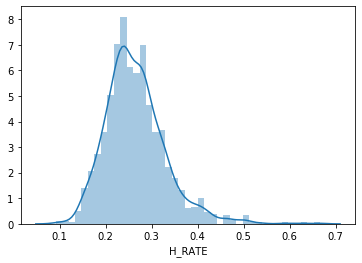

In [58]:
sns.distplot(results['H_RATE'])

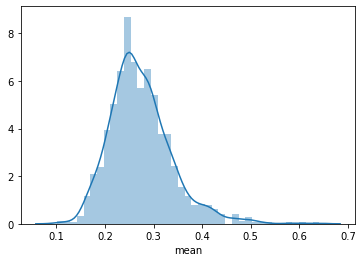

In [59]:
sns.distplot(results['mean'])

# Estimation of pior hyperparameters
- Create model for estimating prior hyperparameter from the date
- Apply bayesian updating on conjugate prior to calculate posterior and expected value

In [60]:
y = df['H_RATE'].values

In [61]:
with pm.Model() as m:
    
    alpha = pm.DiscreteUniform('alpha', lower=2, upper=200)
    beta = pm.DiscreteUniform('beta', lower=15, upper=500)
    
    hit_rate = pm.Beta('hit_rate', alpha = alpha, beta = beta, observed=y)

In [62]:
# MC sampling
with m:
    trace = pm.sample(chains=4)

Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|███████████████████████████████████████| 4000/4000 [00:04<00:00, 896.66draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [63]:
pm.summary(trace, alpha = .05)

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,17.3885,2.150016,0.213157,15.0,22.0,12.511891,1.039049
beta,48.1200,6.099967,0.605155,41.0,61.0,12.416297,1.039993


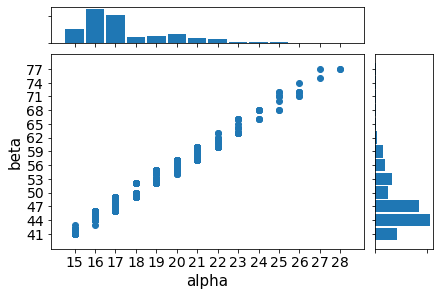

In [64]:
az.plot_joint(trace);

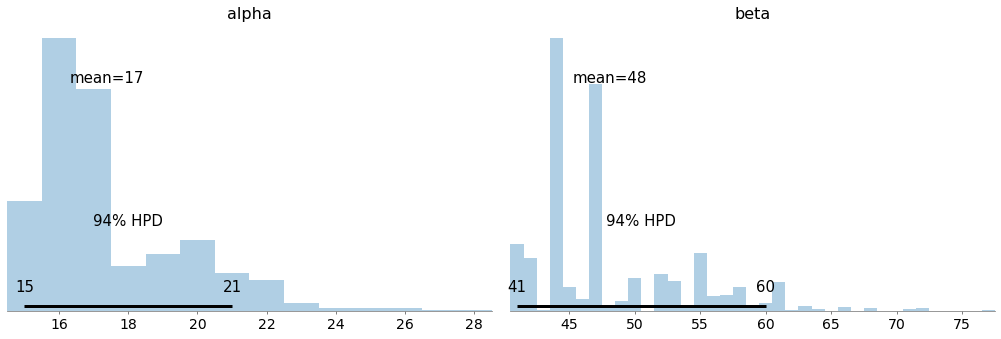

In [65]:
# these are the prior hyperparams that come from the data
az.plot_posterior(trace);

In [66]:
# calculate posterirors hyper parameters
results['alpha0'] = pm.summary(trace).loc['alpha', 'mean']
results['beta0'] = pm.summary(trace).loc['beta', 'mean']
results['alpha_post'] = results['alpha0'] + results['H']
results['beta_post'] = results['beta0'] + (results['AB'] - results['H'])

# and expected value from posterior
results['empirical_mean'] = (results['alpha0'] + results['H']) / (results['alpha0'] + results['beta0'] + results['AB'])

# and lowe/upper bound of credible interval from posterior
results['empirical_hpd_2.5'] = results.apply(lambda x: st.beta.ppf(.025, a=x['alpha_post'], b=x['beta_post']), axis = 1)
results['empirical_hpd_97.5'] = results.apply(lambda x: st.beta.ppf(.975, a=x['alpha_post'], b=x['beta_post']), axis = 1)

results

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,playerID,H,AB,H_RATE,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat,alpha0,beta0,alpha_post,beta_post,empirical_mean,empirical_hpd_2.5,empirical_hpd_97.5
0,aaronha01,25,69,0.362319,0.365943,0.054908,0.000723,0.263248,0.471411,5671.831051,0.999296,17.3885,48.12,42.3885,92.12,0.315136,0.239676,0.395803
1,abbotku01,7,32,0.218750,0.237030,0.075868,0.001104,0.103407,0.389305,4482.966278,0.999281,17.3885,48.12,24.3885,73.12,0.250117,0.169735,0.340202
2,abreubo01,19,67,0.283582,0.289035,0.055538,0.000972,0.176078,0.392593,4377.840291,0.999362,17.3885,48.12,36.3885,96.12,0.274613,0.202299,0.353369
3,abstebi01,6,26,0.230769,0.247640,0.080195,0.001160,0.107059,0.416638,5319.604515,0.999288,17.3885,48.12,23.3885,68.12,0.255588,0.172073,0.349218
4,acunaro01,11,34,0.323529,0.333500,0.077716,0.001161,0.191054,0.486509,4491.360991,0.999245,17.3885,48.12,28.3885,71.12,0.285287,0.201355,0.377392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,zimmech01,6,23,0.260870,0.280930,0.088313,0.001464,0.109228,0.447877,4847.113790,0.999143,17.3885,48.12,23.3885,65.12,0.264251,0.178273,0.360317
1272,zimmehe01,7,43,0.162791,0.177818,0.057315,0.000847,0.072992,0.291897,4206.167970,0.999762,17.3885,48.12,24.3885,84.12,0.224761,0.151644,0.307482
1273,zimmery01,32,117,0.273504,0.277297,0.040784,0.000612,0.201562,0.357434,5033.035476,0.999730,17.3885,48.12,49.3885,133.12,0.270609,0.208818,0.337162
1274,ziskri01,8,20,0.400000,0.408663,0.103476,0.001379,0.208547,0.608059,5387.979625,1.000126,17.3885,48.12,25.3885,60.12,0.296912,0.205449,0.397372


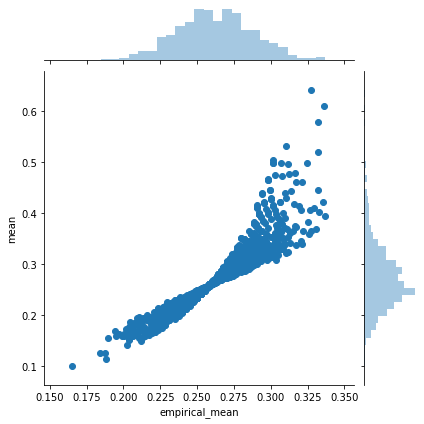

In [67]:
# compare simple model results with empirical bayes results
sns.jointplot(x=results['empirical_mean'], y=results['mean'])

# Bayesian network
- Combine model into a single model
- Model alpha and beta as done in the empircal bayes formulation
- Model the hit rate as done in the simple model above


In [68]:
with pm.Model() as m:
    
    alpha = pm.DiscreteUniform('alpha', lower=5, upper=50)
    beta = pm.DiscreteUniform('beta', lower=5, upper=50)
    
    hit_rate = pm.Beta('hit_rate', alpha = alpha, beta = beta, shape = SHAPE) 
    
    hits = pm.Binomial('hits', n=players[:,1], p = hit_rate, observed = players[:,0], shape = SHAPE)

In [69]:
# MC sampling
with m:
    trace = pm.sample(chains=4)

Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [beta]
>>Metropolis: [alpha]
>NUTS: [hit_rate]
Sampling 4 chains: 100%|████████████████████████████████████████| 4000/4000 [01:33<00:00, 42.77draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.


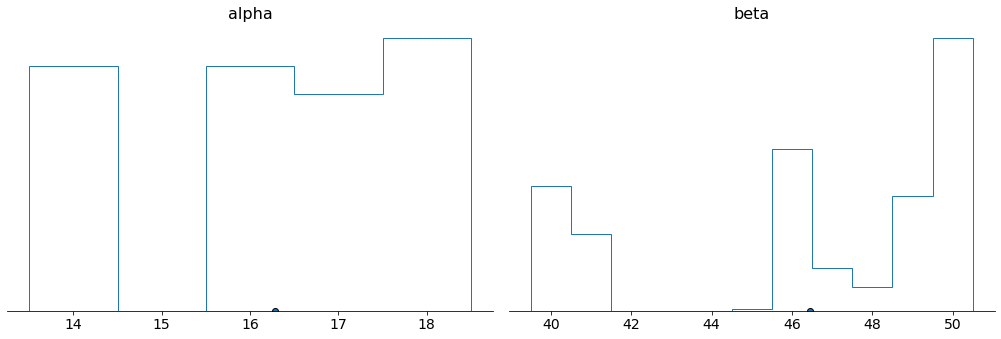

In [70]:
# check posterior for alpha and beta
az.plot_density(trace, var_names=['alpha', 'beta']);

In [71]:
# extract posterior for hit rates (ie drop first two rows equivalent to alpha and beta)
network_results = pm.summary(trace).iloc[2:]
network_results

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
hit_rate__0,0.314296,0.040805,0.000693,0.236430,0.396049,4532.965173,1.003128
hit_rate__1,0.246350,0.045905,0.000675,0.156428,0.335919,5017.904326,1.000741
hit_rate__2,0.271926,0.039907,0.000572,0.197264,0.349596,5270.505995,0.999602
hit_rate__3,0.250475,0.045816,0.000663,0.163443,0.340456,5451.749385,1.000831
hit_rate__4,0.282262,0.046138,0.000758,0.184320,0.364943,4472.801255,0.999618
...,...,...,...,...,...,...,...
hit_rate__1271,0.260132,0.045289,0.000659,0.178777,0.353305,5771.150342,1.000509
hit_rate__1272,0.220073,0.039492,0.000717,0.139027,0.289337,4204.925233,1.003951
hit_rate__1273,0.268780,0.033010,0.000491,0.205787,0.333082,4943.603574,0.999500
hit_rate__1274,0.293809,0.051487,0.000750,0.196884,0.395329,4437.696745,1.000008


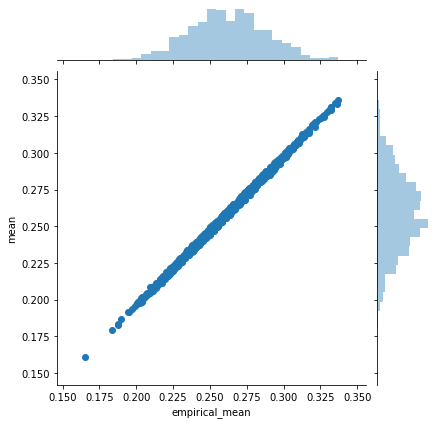

In [72]:
# compare network results with empirical bayes results
sns.jointplot(results['empirical_mean'], network_results['mean']);

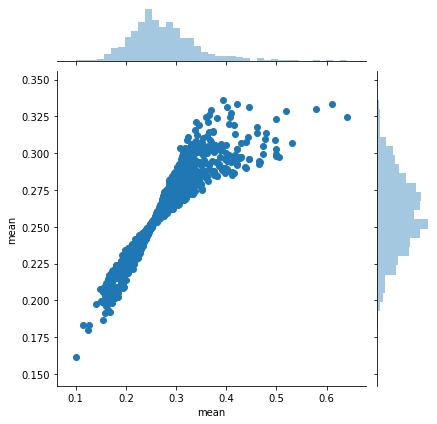

In [73]:
# compare network results with simple model
sns.jointplot(results['mean'], network_results['mean']);

# Join dataframes and rank

In [74]:
network_results.columns = ['network_'+x for x in network_results.columns]
network_results

,network_mean,network_sd,network_mc_error,network_hpd_2.5,network_hpd_97.5,network_n_eff,network_Rhat
hit_rate__0,0.314296,0.040805,0.000693,0.236430,0.396049,4532.965173,1.003128
hit_rate__1,0.246350,0.045905,0.000675,0.156428,0.335919,5017.904326,1.000741
hit_rate__2,0.271926,0.039907,0.000572,0.197264,0.349596,5270.505995,0.999602
hit_rate__3,0.250475,0.045816,0.000663,0.163443,0.340456,5451.749385,1.000831
hit_rate__4,0.282262,0.046138,0.000758,0.184320,0.364943,4472.801255,0.999618
...,...,...,...,...,...,...,...
hit_rate__1271,0.260132,0.045289,0.000659,0.178777,0.353305,5771.150342,1.000509
hit_rate__1272,0.220073,0.039492,0.000717,0.139027,0.289337,4204.925233,1.003951
hit_rate__1273,0.268780,0.033010,0.000491,0.205787,0.333082,4943.603574,0.999500
hit_rate__1274,0.293809,0.051487,0.000750,0.196884,0.395329,4437.696745,1.000008


In [75]:
final_results = pd.concat([results.reset_index(drop=True), network_results.reset_index(drop=True)], axis = 1)

In [77]:
# top players according to simple model
final_results.sort_values('hpd_2.5', ascending=False).head(10)

,playerID,H,AB,H_RATE,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,...,empirical_mean,empirical_hpd_2.5,empirical_hpd_97.5,network_mean,network_sd,network_mc_error,network_hpd_2.5,network_hpd_97.5,network_n_eff,network_Rhat
424,gilbe01,8,12,0.666667,0.641359,0.126240,0.001911,0.407657,0.895725,4922.568189,...,0.327558,0.228309,0.435236,0.324607,0.053663,0.000959,0.230293,0.435729,3806.092829,1.001940
759,mcclell01,10,16,0.625000,0.610511,0.112802,0.001684,0.392099,0.821122,5272.756431,...,0.336020,0.238234,0.441430,0.333120,0.051880,0.000868,0.235831,0.438567,3386.984131,1.002557
89,bicheda01,10,17,0.588235,0.578719,0.110748,0.001775,0.362112,0.789739,4000.104138,...,0.331948,0.235124,0.436489,0.330002,0.050950,0.000924,0.229954,0.421958,3120.378601,1.001734
568,iorgda01,12,23,0.521739,0.519967,0.097334,0.001316,0.334349,0.706135,5350.346716,...,0.332042,0.238359,0.432914,0.328961,0.049725,0.000809,0.229828,0.423606,3865.721476,1.000900
985,roberda01,11,22,0.500000,0.499175,0.093865,0.001509,0.320333,0.691279,4622.206599,...,0.324408,0.230973,0.425447,0.323101,0.050326,0.000784,0.225125,0.424998,4680.237159,1.003348
734,martipe01,23,55,0.418182,0.421885,0.064090,0.000996,0.310076,0.553630,4929.285761,...,0.335151,0.253989,0.421495,0.333724,0.042276,0.000701,0.255317,0.419096,3638.210908,1.001872
128,brownbo03,18,41,0.439024,0.445360,0.073804,0.001148,0.298086,0.582816,4807.827083,...,0.332260,0.246423,0.424064,0.331327,0.047835,0.000923,0.237940,0.419320,2456.563959,1.005909
710,lynnfr01,22,54,0.407407,0.410099,0.065665,0.000907,0.296422,0.552985,6010.967180,...,0.329587,0.248545,0.416032,0.327508,0.044021,0.000789,0.243366,0.411503,3033.444000,1.005260
589,johnsja01,10,21,0.476190,0.479343,0.100411,0.001492,0.295510,0.681572,4746.198923,...,0.316599,0.223461,0.417769,0.313395,0.050582,0.000852,0.217237,0.413570,3919.009978,1.003030
312,duffyhu01,12,26,0.461538,0.462286,0.090843,0.001341,0.288699,0.634882,4211.540117,...,0.321156,0.229987,0.419730,0.317912,0.049822,0.000768,0.225169,0.420714,4218.659493,1.001938


In [78]:
# top players according to empirical model
final_results.sort_values('empirical_hpd_2.5', ascending=False).head(10)

,playerID,H,AB,H_RATE,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,...,empirical_mean,empirical_hpd_2.5,empirical_hpd_97.5,network_mean,network_sd,network_mc_error,network_hpd_2.5,network_hpd_97.5,network_n_eff,network_Rhat
583,jeterde01,200,650,0.307692,0.308268,0.018540,0.000262,0.273945,0.346711,5042.248601,...,0.303824,0.270681,0.338005,0.303574,0.016539,0.000256,0.267960,0.333941,4453.972878,0.999501
412,garvest01,75,222,0.337838,0.339866,0.030498,0.000477,0.281294,0.399100,4796.562742,...,0.321342,0.268682,0.376356,0.321182,0.028435,0.000440,0.271283,0.384075,5109.452716,0.999923
799,molitpa01,43,117,0.367521,0.369894,0.042331,0.000534,0.281484,0.449332,5499.895579,...,0.330880,0.264654,0.400618,0.329397,0.034652,0.000657,0.264456,0.397502,3080.583537,1.002367
126,brocklo01,34,87,0.390805,0.393973,0.053502,0.000695,0.287116,0.496163,5023.858709,...,0.336955,0.264333,0.413628,0.336304,0.038799,0.000591,0.255916,0.408771,5927.947486,1.001322
942,pujolal01,90,279,0.322581,0.323891,0.027251,0.000455,0.268153,0.376953,3844.679609,...,0.311715,0.263948,0.361553,0.311115,0.025424,0.000402,0.263216,0.362154,4530.948390,1.000580
828,munsoth01,46,129,0.356589,0.360148,0.040889,0.000598,0.285031,0.444678,4775.911854,...,0.325891,0.261974,0.393198,0.324646,0.035003,0.000616,0.259720,0.392540,3903.201207,1.000466
416,gehrilo01,43,119,0.361345,0.364916,0.042900,0.000680,0.285064,0.447265,4407.355197,...,0.327294,0.261640,0.396494,0.326058,0.034150,0.000561,0.260966,0.392749,4131.504811,1.000358
1004,rosepe01,86,268,0.320896,0.322371,0.030293,0.000477,0.267702,0.384795,5301.165129,...,0.310003,0.261560,0.360604,0.309081,0.025397,0.000346,0.262601,0.359131,5400.364208,1.000156
1030,sandopa01,53,154,0.344156,0.346355,0.038827,0.000604,0.266082,0.416004,5623.388503,...,0.320664,0.260683,0.383741,0.319030,0.031356,0.000497,0.259557,0.378239,4622.697947,0.999336
125,brettge01,56,166,0.337349,0.338249,0.036579,0.000639,0.273687,0.418012,4345.073300,...,0.317001,0.258758,0.378239,0.315960,0.031255,0.000594,0.257135,0.376782,4283.093242,0.999964


In [76]:
# top players according to network model
final_results.sort_values('network_hpd_2.5', ascending=False).head(10)

,playerID,H,AB,H_RATE,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,...,empirical_mean,empirical_hpd_2.5,empirical_hpd_97.5,network_mean,network_sd,network_mc_error,network_hpd_2.5,network_hpd_97.5,network_n_eff,network_Rhat
412,garvest01,75,222,0.337838,0.339866,0.030498,0.000477,0.281294,0.399100,4796.562742,...,0.321342,0.268682,0.376356,0.321182,0.028435,0.000440,0.271283,0.384075,5109.452716,0.999923
583,jeterde01,200,650,0.307692,0.308268,0.018540,0.000262,0.273945,0.346711,5042.248601,...,0.303824,0.270681,0.338005,0.303574,0.016539,0.000256,0.267960,0.333941,4453.972878,0.999501
799,molitpa01,43,117,0.367521,0.369894,0.042331,0.000534,0.281484,0.449332,5499.895579,...,0.330880,0.264654,0.400618,0.329397,0.034652,0.000657,0.264456,0.397502,3080.583537,1.002367
942,pujolal01,90,279,0.322581,0.323891,0.027251,0.000455,0.268153,0.376953,3844.679609,...,0.311715,0.263948,0.361553,0.311115,0.025424,0.000402,0.263216,0.362154,4530.948390,1.000580
1004,rosepe01,86,268,0.320896,0.322371,0.030293,0.000477,0.267702,0.384795,5301.165129,...,0.310003,0.261560,0.360604,0.309081,0.025397,0.000346,0.262601,0.359131,5400.364208,1.000156
416,gehrilo01,43,119,0.361345,0.364916,0.042900,0.000680,0.285064,0.447265,4407.355197,...,0.327294,0.261640,0.396494,0.326058,0.034150,0.000561,0.260966,0.392749,4131.504811,1.000358
828,munsoth01,46,129,0.356589,0.360148,0.040889,0.000598,0.285031,0.444678,4775.911854,...,0.325891,0.261974,0.393198,0.324646,0.035003,0.000616,0.259720,0.392540,3903.201207,1.000466
1030,sandopa01,53,154,0.344156,0.346355,0.038827,0.000604,0.266082,0.416004,5623.388503,...,0.320664,0.260683,0.383741,0.319030,0.031356,0.000497,0.259557,0.378239,4622.697947,0.999336
125,brettge01,56,166,0.337349,0.338249,0.036579,0.000639,0.273687,0.418012,4345.073300,...,0.317001,0.258758,0.378239,0.315960,0.031255,0.000594,0.257135,0.376782,4283.093242,0.999964
126,brocklo01,34,87,0.390805,0.393973,0.053502,0.000695,0.287116,0.496163,5023.858709,...,0.336955,0.264333,0.413628,0.336304,0.038799,0.000591,0.255916,0.408771,5927.947486,1.001322


# Numerical derivation of alpha_prior and beta_prior

In [79]:
mu = df['H_RATE'].mean()
sigma_sq = np.var(df['H_RATE'], ddof=1)

In [80]:
alpha_prior = mu*(((mu*(1-mu))/sigma_sq) - 1)
beta_prior = (1-mu)*(((mu*(1-mu))/sigma_sq) - 1)

In [81]:
alpha_prior

11.61950041004828

In [82]:
beta_prior

32.26749747295617